In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
os.chdir('../')
from python.create_dgl_dataset import create_dgl_dataset,TelemacDataset
from python.python_code.data_manip.extraction.telemac_file import TelemacFile

import torch
from tqdm import trange
import copy
import pandas as pd
import random
import dgl

In [2]:
res_list = ['./gnn_modulus_project/data/simulations/toy_test_case/petit_modele_test.res']
mesh_list = ['./gnn_modulus_project/data/simulations/toy_test_case/maillage.slf']
cli_list = ['./gnn_modulus_project/data/simulations/toy_test_case/cli']
dt_list = [1]

data_folder = './gnn_modulus_project/data/'
dataset_name = 'toy_one_traj'

In [3]:
create_dgl_dataset(mesh_list,res_list,cli_list,dt_list,data_folder,dataset_name)

True

In [4]:
graphs, _ = dgl.load_graphs(data_folder+'/'+dataset_name+'.bin') 

In [5]:
print(len(graphs))

720


In [6]:
from python.create_dgl_dataset import add_mesh_info
ts = 3
one_hot = graphs[ts].ndata['x'][:,:4]
h = graphs[ts].ndata['x'][:,4:5]
u = graphs[ts].ndata['x'][:,5:6]
v = graphs[ts].ndata['x'][:,6:7]
k = graphs[ts].ndata['x'][:,7:8]
hstar = graphs[ts].ndata['y'][:,0:1]
res_mesh = TelemacFile(mesh_list[0])
X,triangles = add_mesh_info(res_mesh)

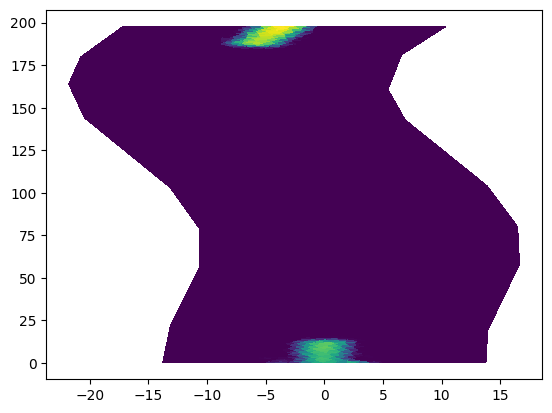

In [7]:
plt.figure()
plt.tripcolor(X[:,0],X[:,1],h[:,0],triangles=triangles)
plt.show()

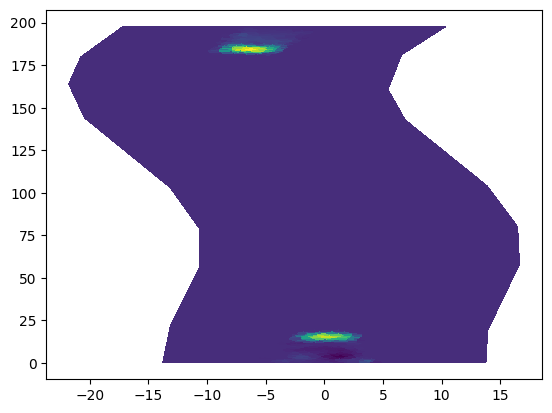

In [8]:
plt.figure()
plt.tripcolor(X[:,0],X[:,1],hstar[:,0],triangles=triangles)
plt.show()

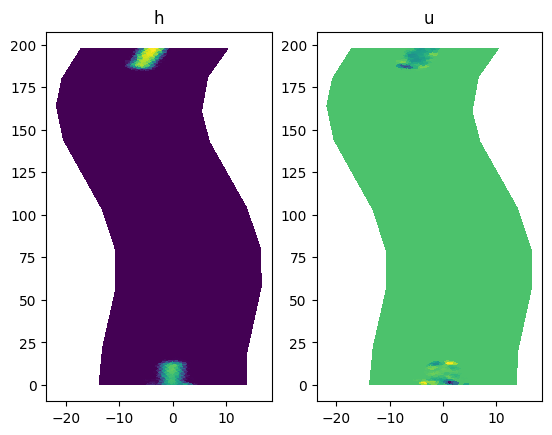

In [9]:
plt.figure()

plt.subplot(1, 2, 1)
plt.tripcolor(X[:,0],X[:,1],h[:,0],triangles=triangles)
plt.title('h')

plt.subplot(1, 2, 2)
plt.tripcolor(X[:,0],X[:,1],u[:,0],triangles=triangles)
plt.title('u')

plt.show()

In [10]:
acc = 0 
for i in range(720):
    h = graphs[i].ndata['x'][:,4:5]
    u = graphs[i].ndata['x'][:,5:6]
    u_where_h_0 = u[h[:,0]==0.0,0]
    u_non_0_where_h_0 = u_where_h_0[u_where_h_0!=0.0]
    acc+=u_non_0_where_h_0[torch.abs(u_non_0_where_h_0)>10**-1].shape[0]
print(acc)

0


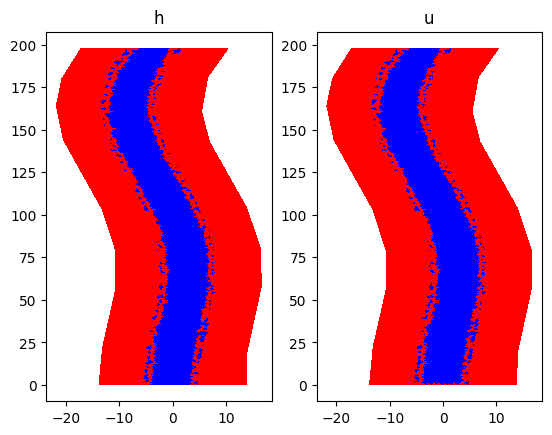

In [11]:
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#0000FF', '#FF0000'])

plt.figure()

plt.subplot(1, 2, 1)
plt.tripcolor(X[:,0],X[:,1],h[:,0]==0.0,triangles=triangles,cmap=cmap)
plt.title('h')

plt.subplot(1, 2, 2)
plt.tripcolor(X[:,0],X[:,1],u[:,0]==0.0,triangles=triangles,cmap=cmap)
plt.title('u')

plt.show()

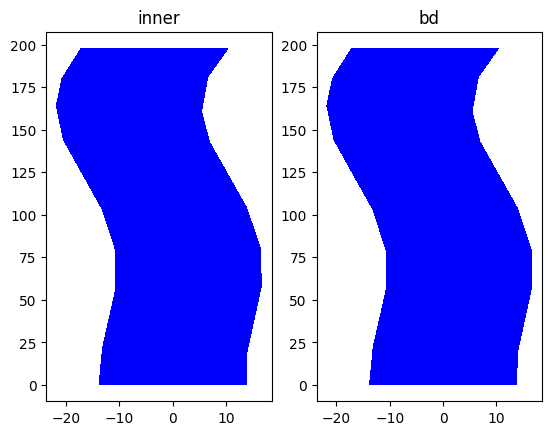

In [12]:
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#0000FF', '#FF0000'])

plt.figure()

plt.subplot(1, 2, 1)
plt.tripcolor(X[:,0],X[:,1],one_hot[:,0]==0.0,triangles=triangles,cmap=cmap)
plt.title('inner')

plt.subplot(1, 2, 2)
plt.tripcolor(X[:,0],X[:,1],one_hot[:,0]!=0.0,triangles=triangles,cmap=cmap)
plt.title('bd')

plt.show()

In [13]:
dataset = dataset = TelemacDataset(
            name="telemac_train",
            data_dir=data_folder+'/'+dataset_name+'.bin',
            split="train",
            num_samples=1,
            num_steps=720,
        )

{'h': tensor([0.0953]), 'u': tensor([-0.0004]), 'v': tensor([0.1140]), 'strickler': tensor([16.2529]), 'z': tensor([-0.5487]), 'delta_h': tensor([0.0002]), 'delta_u': tensor([-7.2438e-07]), 'delta_v': tensor([0.0002]), 'h_std': tensor([0.3001]), 'u_std': tensor([0.0503]), 'v_std': tensor([0.3657]), 'strickler_std': tensor([7.2369]), 'z_std': tensor([0.8599]), 'delta_h_std': tensor([0.0034]), 'delta_u_std': tensor([0.0113]), 'delta_v_std': tensor([0.0140])}


In [14]:
print(len(dataset))

719


In [15]:
(dataset[10].ndata['x'][11014,:4].numpy())

array([0., 0., 0., 0.], dtype=float32)

NameError: name 'mask' is not defined

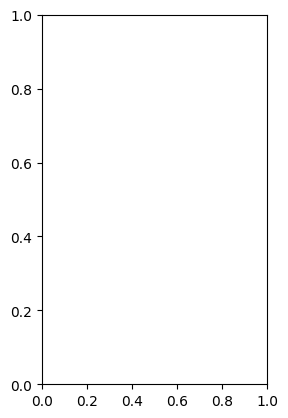

In [16]:
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['#0000FF', '#FF0000'])

plt.figure()

plt.subplot(1, 2, 1)
plt.tripcolor(X[:,0],X[:,1],mask!=0.0,triangles=triangles,cmap=cmap)
plt.title('inner')

plt.subplot(1, 2, 2)
plt.tripcolor(X[:,0],X[:,1],mask==0.0,triangles=triangles,cmap=cmap)
plt.title('bd')

plt.show()